In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# *1-Sklearn*

#Fichier 1

In [ ]:
fic1 = pd.read_fwf('/content/drive/MyDrive/ANS/Projet_ACP/mfeat/mfeat-fac',header=None)
fic1.head()

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,98,236,531,673,607,647,2,9,3,6,...,474,536,628,632,18,36,8,15,12,13
1,121,193,607,611,585,665,7,9,2,4,...,520,458,570,634,15,32,11,13,15,11
2,115,141,590,605,557,627,12,6,3,3,...,535,498,572,656,20,35,16,14,13,6
3,90,122,627,692,607,642,0,6,4,5,...,576,549,628,621,16,35,7,12,15,9
4,157,167,681,666,587,666,8,6,1,4,...,594,525,568,653,16,35,10,15,13,13


In [ ]:
fic1.shape

(2000, 216)

In [ ]:
def rename_colunms(df,liste):
  new_liste = liste
  for i in range(df.shape[1]):
    df.columns = new_liste

In [ ]:
#rename colunm name
liste = [ "fac"+str(i) for i in range(fic1.shape[1])]
rename_colunms(fic1,liste)
fic1.head()

,fac0,fac1,fac2,fac3,fac4,fac5,fac6,fac7,fac8,fac9,...,fac206,fac207,fac208,fac209,fac210,fac211,fac212,fac213,fac214,fac215
0,98,236,531,673,607,647,2,9,3,6,...,474,536,628,632,18,36,8,15,12,13
1,121,193,607,611,585,665,7,9,2,4,...,520,458,570,634,15,32,11,13,15,11
2,115,141,590,605,557,627,12,6,3,3,...,535,498,572,656,20,35,16,14,13,6
3,90,122,627,692,607,642,0,6,4,5,...,576,549,628,621,16,35,7,12,15,9
4,157,167,681,666,587,666,8,6,1,4,...,594,525,568,653,16,35,10,15,13,13


Normalisation

In [ ]:
scaler = StandardScaler()
normalized_fic1 = scaler.fit_transform(fic1)
normalized_fic1

array([[-1.90735868, -0.79274325, -0.86503711, ...,  1.17558452,
        -0.85869511, -0.09760513],
       [-1.65531116, -1.18579904, -0.49944277, ...,  0.40013299,
         0.65264858, -0.52900903],
       [-1.72106269, -1.66112232, -0.58122045, ...,  0.78785876,
        -0.35491388, -1.60751878],
       ...,
       [ 0.71174385, -0.21687082,  0.67911796, ...,  1.17558452,
         1.66021104,  1.62801046],
       [-0.27452907, -0.56422244,  0.74646428, ...,  0.40013299,
         0.65264858,  0.33379877],
       [ 0.90899844,  0.51439577,  0.75127473, ...,  0.01240722,
        -0.85869511,  1.41230851]])

Visualisation de notre dataset en reduisant les 216 variables à 2 variables

In [ ]:
model = PCA(n_components=2)
fic_reduced = model.fit_transform(normalized_fic1)

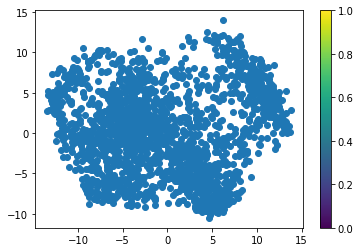

In [ ]:
plt.scatter(fic_reduced[:,0],fic_reduced[:,1])

**Reduction des dimensions et classification avec Kmeans**

Objectif : reduire le nombre de variable en concervant 95%-99% de la variance

In [ ]:
model = PCA(n_components=216)
fic_model = model.fit_transform(normalized_fic1)

In [ ]:
#on regarde le % de variance preservé par chaque variable
model.explained_variance_ratio_

array([2.01491185e-01, 1.32271782e-01, 1.02578751e-01, 6.98133024e-02,
       5.61515227e-02, 4.54903904e-02, 3.56224270e-02, 3.11108135e-02,
       2.56823704e-02, 2.34944049e-02, 1.91933554e-02, 1.69670654e-02,
       1.52202416e-02, 1.30540379e-02, 1.19721823e-02, 1.13143566e-02,
       1.06816639e-02, 8.95112737e-03, 8.63069807e-03, 7.28481816e-03,
       7.15240485e-03, 6.87229400e-03, 6.18194125e-03, 5.72906219e-03,
       5.58320566e-03, 4.96872085e-03, 4.66676938e-03, 4.28078147e-03,
       4.12414474e-03, 3.90398610e-03, 3.86961900e-03, 3.74640458e-03,
       3.63397669e-03, 3.50574242e-03, 3.37342730e-03, 3.24471245e-03,
       3.04677835e-03, 2.95539868e-03, 2.56210751e-03, 2.40369009e-03,
       2.37724684e-03, 2.31177318e-03, 2.13401940e-03, 1.97873969e-03,
       1.91045488e-03, 1.83507265e-03, 1.78169314e-03, 1.73872832e-03,
       1.66868041e-03, 1.62168455e-03, 1.61545358e-03, 1.50512794e-03,
       1.43701651e-03, 1.38185788e-03, 1.35429191e-03, 1.28259710e-03,
      

In [ ]:
#On fait la somme cumule des % et chercher le moment ou elle atteint 95% ou 99%
np.cumsum(model.explained_variance_ratio_)

array([0.20149118, 0.33376297, 0.43634172, 0.50615502, 0.56230654,
       0.60779693, 0.64341936, 0.67453017, 0.70021254, 0.72370695,
       0.7429003 , 0.75986737, 0.77508761, 0.78814165, 0.80011383,
       0.81142819, 0.82210985, 0.83106098, 0.83969168, 0.8469765 ,
       0.8541289 , 0.86100119, 0.86718314, 0.8729122 , 0.8784954 ,
       0.88346412, 0.88813089, 0.89241168, 0.89653582, 0.90043981,
       0.90430943, 0.90805583, 0.91168981, 0.91519555, 0.91856898,
       0.92181369, 0.92486047, 0.92781587, 0.93037797, 0.93278166,
       0.93515891, 0.93747068, 0.9396047 , 0.94158344, 0.9434939 ,
       0.94532897, 0.94711066, 0.94884939, 0.95051807, 0.95213976,
       0.95375521, 0.95526034, 0.95669735, 0.95807921, 0.9594335 ,
       0.9607161 , 0.96195628, 0.9631731 , 0.96434353, 0.96546934,
       0.96658552, 0.96766308, 0.96870584, 0.9696996 , 0.97067333,
       0.97162029, 0.97254586, 0.97345064, 0.97433569, 0.97518393,
       0.97599811, 0.97677751, 0.97754367, 0.97829369, 0.97900

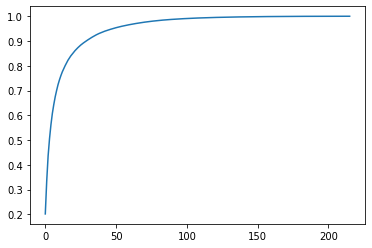

In [ ]:
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [ ]:
#on regarde à partir de quelle composante on atteint 99% de la variance
np.argmax(np.cumsum(model.explained_variance_ratio_) > 0.99 )

98

A partir de 98 composante on atteint 99% de la variance alors on peut reduire notre dimension à 98 variables

In [ ]:
model = PCA(n_components=98)
reduced_fic_1 = model.fit_transform(normalized_fic1)

In [ ]:
reduced_fic_1.shape

(2000, 98)

Classification Avec Kmeans

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(reduced_fic_1)

In [ ]:
kmeans.predict(reduced_fic_1)

array([1, 1, 1, ..., 5, 5, 5], dtype=int32)

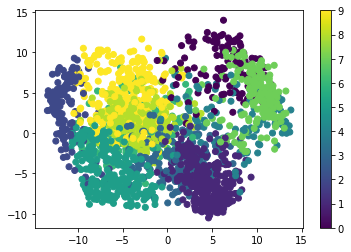

In [ ]:
plt.scatter(reduced_fic_1[:,0],reduced_fic_1[:,1],c=kmeans.predict(reduced_fic_1))
plt.colorbar()
#On affiche nos centroides en rouge
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r')

#Fichier 2

In [ ]:
fic2 = pd.read_fwf('/content/drive/MyDrive/ANS/Projet_ACP/mfeat/mfeat-fou',header=None)
fic2.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,0.065882,0.197312,0.103826,0.270362,0.616078,0.035856,0.424572,0.089701,0.367773,0.037065,...,0.123448,0.113374,0.074343,0.281666,0.067795,0.344182,0.038963,0.394366,0.049971,0.344871
1,0.049142,0.175971,0.105515,0.227095,0.599280,0.041217,0.431078,0.096801,0.326739,0.059661,...,0.045310,0.069337,0.045386,0.254264,0.045447,0.335659,0.021719,0.445277,0.083978,0.354092
2,0.034172,0.227649,0.108766,0.127697,0.612494,0.056554,0.470639,0.041903,0.324267,0.044569,...,0.019858,0.218842,0.041087,0.360464,0.047154,0.377408,0.052099,0.445029,0.071234,0.261465
3,0.062336,0.217979,0.080243,0.289592,0.546316,0.045779,0.425545,0.022841,0.331454,0.119052,...,0.083995,0.085479,0.087658,0.151880,0.075950,0.293462,0.022675,0.408291,0.063010,0.401376
4,0.061970,0.198358,0.111239,0.253460,0.608455,0.023631,0.415246,0.091866,0.309310,0.049142,...,0.021004,0.106960,0.032283,0.248565,0.015674,0.386276,0.039481,0.434701,0.069218,0.405403


In [ ]:
fic2.shape

(2000, 76)

In [ ]:
#rename colunm name
liste = [ "fou"+str(i) for i in range(fic2.shape[1])]
rename_colunms(fic2,liste)
fic2.head()

,fou0,fou1,fou2,fou3,fou4,fou5,fou6,fou7,fou8,fou9,...,fou66,fou67,fou68,fou69,fou70,fou71,fou72,fou73,fou74,fou75
0,0.065882,0.197312,0.103826,0.270362,0.616078,0.035856,0.424572,0.089701,0.367773,0.037065,...,0.123448,0.113374,0.074343,0.281666,0.067795,0.344182,0.038963,0.394366,0.049971,0.344871
1,0.049142,0.175971,0.105515,0.227095,0.599280,0.041217,0.431078,0.096801,0.326739,0.059661,...,0.045310,0.069337,0.045386,0.254264,0.045447,0.335659,0.021719,0.445277,0.083978,0.354092
2,0.034172,0.227649,0.108766,0.127697,0.612494,0.056554,0.470639,0.041903,0.324267,0.044569,...,0.019858,0.218842,0.041087,0.360464,0.047154,0.377408,0.052099,0.445029,0.071234,0.261465
3,0.062336,0.217979,0.080243,0.289592,0.546316,0.045779,0.425545,0.022841,0.331454,0.119052,...,0.083995,0.085479,0.087658,0.151880,0.075950,0.293462,0.022675,0.408291,0.063010,0.401376
4,0.061970,0.198358,0.111239,0.253460,0.608455,0.023631,0.415246,0.091866,0.309310,0.049142,...,0.021004,0.106960,0.032283,0.248565,0.015674,0.386276,0.039481,0.434701,0.069218,0.405403


**Reduction des dimension et Classification avec Kmeans **

Objectif : reduire le nombre de variable en concervant 95%-99% de la variance

In [ ]:
scaler = StandardScaler()
normalized_fic2 = scaler.fit_transform(fic2)
normalized_fic2

array([[-1.30245067, -1.02163771, -1.20012317, ...,  0.96643443,
        -1.09773269,  1.03419088],
       [-1.48465024, -1.14276502, -1.18787917, ...,  1.35514092,
        -0.70064333,  1.10923272],
       [-1.64759166, -0.84944988, -1.16430673, ...,  1.35324753,
        -0.84945383,  0.35541552],
       ...,
       [ 1.63332598, -0.33421707, -0.08285457, ..., -0.96360498,
        -1.2284496 , -0.83986832],
       [ 0.74411332, -1.16982877,  0.24099543, ..., -0.28603576,
        -0.47077484, -0.71444403],
       [ 0.93638811, -1.29563629, -0.26550368, ...,  0.06095674,
        -1.43514367, -1.07872483]])

In [ ]:
model_2 = PCA(n_components=76)
fic2_model = model_2.fit_transform(normalized_fic2)

In [ ]:
#on regarde le % de variance preservé par chaque variable
model_2.explained_variance_ratio_

array([0.15620337, 0.06826853, 0.06249401, 0.03627168, 0.03336397,
       0.03197384, 0.02857812, 0.02658099, 0.02504097, 0.02279372,
       0.02144504, 0.02091663, 0.01969269, 0.01901036, 0.01788369,
       0.0175482 , 0.0158317 , 0.01472991, 0.01405329, 0.01382549,
       0.01273457, 0.01208695, 0.01150808, 0.01128627, 0.01105635,
       0.01065308, 0.01037188, 0.00999514, 0.00980427, 0.00942924,
       0.00924946, 0.0089915 , 0.00871012, 0.00850656, 0.00801393,
       0.00785104, 0.00759047, 0.0072001 , 0.00715093, 0.00699245,
       0.00689496, 0.00677808, 0.00643966, 0.00623307, 0.00616534,
       0.00606603, 0.00583004, 0.00569248, 0.00538319, 0.0052589 ,
       0.00508204, 0.00504304, 0.00475084, 0.00453605, 0.00430228,
       0.00428736, 0.00420984, 0.00397883, 0.0038387 , 0.00363248,
       0.00350827, 0.00347291, 0.00320536, 0.00302996, 0.00289957,
       0.00282867, 0.00268202, 0.00262528, 0.00239018, 0.00224782,
       0.00211884, 0.00207557, 0.00197353, 0.00186543, 0.00170

In [ ]:
#On fait la somme cumule des % et chercher le moment ou elle atteint 95% ou 99%
np.cumsum(model_2.explained_variance_ratio_)

array([0.15620337, 0.22447189, 0.2869659 , 0.32323758, 0.35660154,
       0.38857539, 0.4171535 , 0.4437345 , 0.46877546, 0.49156919,
       0.51301423, 0.53393086, 0.55362355, 0.57263392, 0.5905176 ,
       0.6080658 , 0.6238975 , 0.63862741, 0.6526807 , 0.66650619,
       0.67924076, 0.69132771, 0.70283578, 0.71412205, 0.7251784 ,
       0.73583148, 0.74620336, 0.7561985 , 0.76600276, 0.775432  ,
       0.78468147, 0.79367296, 0.80238309, 0.81088965, 0.81890358,
       0.82675461, 0.83434508, 0.84154518, 0.84869611, 0.85568856,
       0.86258352, 0.8693616 , 0.87580126, 0.88203432, 0.88819967,
       0.8942657 , 0.90009574, 0.90578823, 0.91117142, 0.91643032,
       0.92151236, 0.9265554 , 0.93130624, 0.93584229, 0.94014457,
       0.94443193, 0.94864177, 0.9526206 , 0.9564593 , 0.96009178,
       0.96360005, 0.96707296, 0.97027833, 0.97330828, 0.97620785,
       0.97903652, 0.98171855, 0.98434383, 0.98673401, 0.98898183,
       0.99110067, 0.99317624, 0.99514976, 0.9970152 , 0.99872

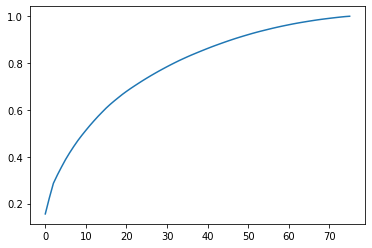

In [ ]:
plt.plot(np.cumsum(model_2.explained_variance_ratio_))

In [ ]:
#on regarde à partir de quelle composante on atteint 99% de la variance
np.argmax(np.cumsum(model_2.explained_variance_ratio_) > 0.99 )

70

A partir de 70 composante on atteint 99% de la variance alors on peut reduire notre dimension à 70 variables

In [ ]:
reduce_model = PCA(n_components=70)
reduced_fic_2 = reduce_model.fit_transform(normalized_fic2)

In [ ]:
reduced_fic_2.shape

(2000, 70)

In [ ]:
kmeans_2 = KMeans(n_clusters=10, random_state=0).fit(reduced_fic_2)
kmeans_2.predict(reduced_fic_2)

array([2, 2, 2, ..., 7, 4, 4], dtype=int32)

Visualisation des classes


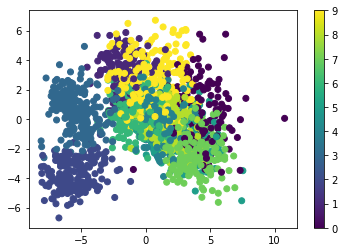

In [ ]:
plt.scatter(reduced_fic_2[:,0],reduced_fic_2[:,1],c=kmeans_2.predict(reduced_fic_2))
plt.colorbar()
#On affiche nos centroides en rouge
#plt.scatter(kmeans_2.cluster_centers_[:,0],kmeans_2.cluster_centers_[:,1],c='r')

#Fichier 3

In [ ]:
fic3 = pd.read_fwf('/content/drive/MyDrive/ANS/Projet_ACP/mfeat/mfeat-kar',header=None)
fic3.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-10.297008,-11.666789,11.560669,-2.081316,4.044656,4.086815,-2.558072,-8.476935,2.138135,3.503082,...,1.078083,0.921927,0.496387,-0.643667,0.284104,0.286555,0.348625,1.814691,-1.351353,-0.473910
1,-5.036009,-12.885333,0.161155,0.592460,3.123534,4.220469,-6.411771,-6.335328,-0.244622,1.346073,...,0.942353,2.938791,1.429883,-2.336344,1.281628,-0.098321,0.582357,0.485792,0.642451,0.613107
2,-9.639157,-6.655898,0.388687,-1.717650,0.300346,3.400769,-7.240785,-1.659405,-0.874005,4.153403,...,-0.413174,-0.023028,-0.025265,1.259838,-0.441360,-0.960094,1.995843,1.097748,0.827182,-1.767840
3,-6.650375,-7.043851,4.104350,-2.342780,3.494658,3.924822,-9.874812,-6.556576,-1.364269,1.153308,...,-0.961236,-1.043815,-0.204508,-1.981150,0.982438,-0.144233,-1.449328,-0.913552,-0.771735,0.304992
4,-10.664524,-10.974133,0.194391,0.453885,2.193088,-3.304663,-8.376592,-4.241146,2.964818,-0.949622,...,0.152957,1.448160,-1.254907,-3.481295,-0.563889,1.529335,0.510399,0.298318,-0.943213,1.149847


In [ ]:
fic3.shape

(2000, 64)

In [ ]:
#rename colunm name
liste = [ "kar"+str(i) for i in range(fic3.shape[1])]
rename_colunms(fic3,liste)
fic3.head()

,kar0,kar1,kar2,kar3,kar4,kar5,kar6,kar7,kar8,kar9,...,kar54,kar55,kar56,kar57,kar58,kar59,kar60,kar61,kar62,kar63
0,-10.297008,-11.666789,11.560669,-2.081316,4.044656,4.086815,-2.558072,-8.476935,2.138135,3.503082,...,1.078083,0.921927,0.496387,-0.643667,0.284104,0.286555,0.348625,1.814691,-1.351353,-0.473910
1,-5.036009,-12.885333,0.161155,0.592460,3.123534,4.220469,-6.411771,-6.335328,-0.244622,1.346073,...,0.942353,2.938791,1.429883,-2.336344,1.281628,-0.098321,0.582357,0.485792,0.642451,0.613107
2,-9.639157,-6.655898,0.388687,-1.717650,0.300346,3.400769,-7.240785,-1.659405,-0.874005,4.153403,...,-0.413174,-0.023028,-0.025265,1.259838,-0.441360,-0.960094,1.995843,1.097748,0.827182,-1.767840
3,-6.650375,-7.043851,4.104350,-2.342780,3.494658,3.924822,-9.874812,-6.556576,-1.364269,1.153308,...,-0.961236,-1.043815,-0.204508,-1.981150,0.982438,-0.144233,-1.449328,-0.913552,-0.771735,0.304992
4,-10.664524,-10.974133,0.194391,0.453885,2.193088,-3.304663,-8.376592,-4.241146,2.964818,-0.949622,...,0.152957,1.448160,-1.254907,-3.481295,-0.563889,1.529335,0.510399,0.298318,-0.943213,1.149847


**Reduction des dimension et Classification avec Kmeans**

In [ ]:
scaler = StandardScaler()
normalized_fic3 = scaler.fit_transform(fic3)
normalized_fic3

array([[-1.19354001, -1.92157541,  1.79795999, ...,  2.07224197,
        -1.78357951, -0.28517412],
       [-0.50934996, -2.1347926 , -0.2929632 , ...,  0.5951963 ,
         0.45132277,  0.7765261 ],
       [-1.10798694, -1.0447846 , -0.25122886, ...,  1.2753739 ,
         0.65839276, -1.54896781],
       ...,
       [ 0.39028304, -1.56883781, -0.26423467, ..., -0.43339942,
         0.05290387, -0.23329375],
       [-0.05351061, -1.66208204, -0.5161914 , ...,  1.61711592,
         0.21936254, -0.04247747],
       [ 1.60884916, -0.92296445,  0.66194896, ...,  0.06404164,
         0.58753766,  0.21712698]])

In [ ]:
model_3 = PCA(n_components=64)
fic3_model = model_3.fit_transform(normalized_fic3)

In [ ]:
#on regarde le % de variance preservé par chaque variable
model_3.explained_variance_ratio_

array([0.09117957, 0.07761401, 0.05524722, 0.05038836, 0.04136779,
       0.03696063, 0.03278768, 0.02984995, 0.02659327, 0.02378742,
       0.02305363, 0.02208281, 0.02154018, 0.02037955, 0.01954989,
       0.01813908, 0.01709842, 0.01676602, 0.01617873, 0.01577308,
       0.01503034, 0.01453418, 0.01419263, 0.01350255, 0.01251891,
       0.0124429 , 0.01211324, 0.01166057, 0.01137127, 0.01121476,
       0.01084329, 0.01073192, 0.0103346 , 0.00988749, 0.00981097,
       0.00939672, 0.00901451, 0.00855344, 0.008298  , 0.00821358,
       0.00792817, 0.00756297, 0.00749496, 0.00735157, 0.00696461,
       0.0066676 , 0.00659824, 0.00620331, 0.00603147, 0.0057464 ,
       0.00555207, 0.00548351, 0.00509132, 0.00481699, 0.00479065,
       0.00464105, 0.00422384, 0.00401441, 0.00386172, 0.00322647,
       0.00274973, 0.00175004, 0.00090854, 0.0003372 ])

In [ ]:
#On fait la somme cumule des % et chercher le moment ou elle atteint 95% ou 99%
np.cumsum(model_3.explained_variance_ratio_)

array([0.09117957, 0.16879358, 0.2240408 , 0.27442916, 0.31579695,
       0.35275758, 0.38554526, 0.41539521, 0.44198847, 0.46577589,
       0.48882952, 0.51091233, 0.53245251, 0.55283207, 0.57238196,
       0.59052104, 0.60761946, 0.62438548, 0.64056421, 0.65633729,
       0.67136762, 0.6859018 , 0.70009443, 0.71359699, 0.72611589,
       0.7385588 , 0.75067204, 0.7623326 , 0.77370387, 0.78491863,
       0.79576192, 0.80649384, 0.81682844, 0.82671593, 0.8365269 ,
       0.84592362, 0.85493813, 0.86349158, 0.87178958, 0.88000316,
       0.88793133, 0.8954943 , 0.90298926, 0.91034083, 0.91730544,
       0.92397304, 0.93057128, 0.93677458, 0.94280606, 0.94855245,
       0.95410453, 0.95958804, 0.96467936, 0.96949634, 0.974287  ,
       0.97892804, 0.98315189, 0.98716629, 0.99102802, 0.99425449,
       0.99700422, 0.99875426, 0.9996628 , 1.        ])

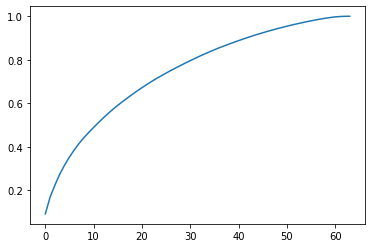

In [ ]:
plt.plot(np.cumsum(model_3.explained_variance_ratio_))

In [ ]:
#on regarde à partir de quelle composante on atteint 99% de la variance
np.argmax(np.cumsum(model_3.explained_variance_ratio_) > 0.99 )

58

In [ ]:
reduce_model_3 = PCA(n_components=58)
reduced_fic_3 = reduce_model_3.fit_transform(normalized_fic3)

In [ ]:
reduced_fic_3.shape

(2000, 58)

A partir de 58 composante on atteint 99% de la variance alors on peut reduire notre dimension à 58 variables

In [ ]:
kmeans_3 = KMeans(n_clusters=10, random_state=0).fit(reduced_fic_3)
kmeans_3.predict(reduced_fic_3)

array([5, 1, 5, ..., 8, 8, 8], dtype=int32)

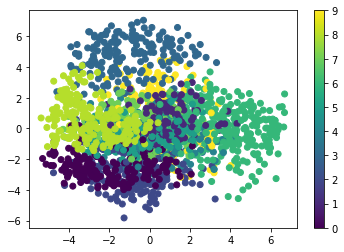

In [ ]:
plt.scatter(reduced_fic_3[:,0],reduced_fic_3[:,1],c=kmeans_3.predict(reduced_fic_3))
plt.colorbar()
#On affiche nos centroides en rouge
#plt.scatter(kmeans_2.cluster_centers_[:,0],kmeans_2.cluster_centers_[:,1],c='r')

#Fichier 4

In [ ]:
fic4 = pd.read_fwf('/content/drive/MyDrive/ANS/Projet_ACP/mfeat/mfeat-mor',header=None)
fic4.head()

,0,1,2,3,4,5
0,1.0,0.0,0.0,133.150861,1.311693,1620.221779
1,1.0,0.0,0.0,126.724861,1.302745,1609.334822
2,1.0,0.0,0.0,131.173861,1.319031,1568.978435
3,1.0,0.0,0.0,129.478861,1.270878,1695.055281
4,1.0,0.0,0.0,127.262861,1.329637,1647.720235


In [ ]:
fic4.shape

(2000, 6)

In [ ]:
#rename colunm name
liste = [ "mor"+str(i) for i in range(fic4.shape[1])]
rename_colunms(fic4,liste)
fic4.head()

,mor0,mor1,mor2,mor3,mor4,mor5
0,1.0,0.0,0.0,133.150861,1.311693,1620.221779
1,1.0,0.0,0.0,126.724861,1.302745,1609.334822
2,1.0,0.0,0.0,131.173861,1.319031,1568.978435
3,1.0,0.0,0.0,129.478861,1.270878,1695.055281
4,1.0,0.0,0.0,127.262861,1.329637,1647.720235


In [ ]:
scaler = StandardScaler()
normalized_fic4 = scaler.fit_transform(fic4)
normalized_fic4

array([[ 0.76340069, -1.51835049, -1.01989185, -0.93058101, -1.12578212,
        -1.01733935],
       [ 0.76340069, -1.51835049, -1.01989185, -1.18758235, -1.15650489,
        -1.02159111],
       [ 0.76340069, -1.51835049, -1.01989185, -1.00964912, -1.10058579,
        -1.03735175],
       ...,
       [ 0.76340069, -0.64246327,  0.4095291 , -0.86971016, -0.33505175,
        -0.17903648],
       [ 0.76340069, -0.64246327,  0.4095291 , -0.53959982, -0.73199323,
        -0.04173786],
       [ 0.76340069, -0.64246327,  0.4095291 , -0.89978564, -0.25733936,
        -0.16292369]])

In [ ]:
model_4 = PCA(n_components=6)
fic4_model = model_4.fit_transform(normalized_fic4)

In [ ]:
#on regarde le % de variance preservé par chaque variable
model_4.explained_variance_ratio_

array([0.5774585 , 0.18458144, 0.14888836, 0.07918386, 0.00892703,
       0.00096081])

In [ ]:
#On fait la somme cumule des % et chercher le moment ou elle atteint 95% ou 99%
np.cumsum(model_4.explained_variance_ratio_)

array([0.5774585 , 0.76203994, 0.9109283 , 0.99011215, 0.99903919,
       1.        ])

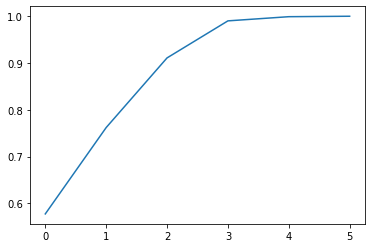

In [ ]:
plt.plot(np.cumsum(model_4.explained_variance_ratio_))

In [ ]:
#on regarde à partir de quelle composante on atteint 99% de la variance
np.argmax(np.cumsum(model_4.explained_variance_ratio_) > 0.99 )

3

In [ ]:
reduce_model_4 = PCA(n_components=3)
reduced_fic_4 = reduce_model_4.fit_transform(normalized_fic4)

In [ ]:
reduced_fic_4.shape

(2000, 3)

In [ ]:
kmeans_4 = KMeans(n_clusters=10, random_state=0).fit(reduced_fic_4)
kmeans_4.predict(reduced_fic_4)

array([6, 6, 6, ..., 1, 1, 1], dtype=int32)

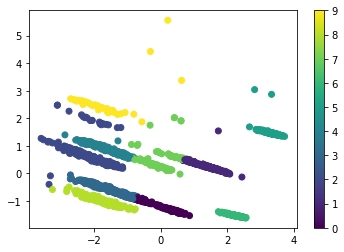

In [ ]:
plt.scatter(reduced_fic_4[:,0],reduced_fic_4[:,1],c=kmeans_4.predict(reduced_fic_4))
plt.colorbar()
#On affiche nos centroides en rouge
#plt.scatter(kmeans_4.cluster_centers_[:,0],kmeans_4.cluster_centers_[:,1],c='r')

#Fichier 5

In [ ]:
fic5 = pd.read_fwf('/content/drive/MyDrive/ANS/Projet_ACP/mfeat/mfeat-pix',header=None)
fic5.head()

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,0,3,4,4,6,6,6,6,6,5,...,4,4,4,4,4,3,0,0,0,0
1,0,0,0,0,0,0,1,3,4,4,...,2,4,4,4,4,2,0,0,0,0
2,0,0,1,4,4,4,4,4,4,3,...,1,3,4,4,4,4,4,2,1,0
3,0,0,3,3,2,2,4,5,6,6,...,4,4,4,4,2,0,0,0,0,0
4,0,0,0,0,0,0,3,4,6,6,...,4,4,4,4,3,1,0,0,0,0


In [ ]:
fic5.shape

(2000, 240)

In [ ]:
#rename colunm name
liste = [ "pix"+str(i) for i in range(fic5.shape[1])]
rename_colunms(fic5,liste)
fic5.head()

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix230,pix231,pix232,pix233,pix234,pix235,pix236,pix237,pix238,pix239
0,0,3,4,4,6,6,6,6,6,5,...,4,4,4,4,4,3,0,0,0,0
1,0,0,0,0,0,0,1,3,4,4,...,2,4,4,4,4,2,0,0,0,0
2,0,0,1,4,4,4,4,4,4,3,...,1,3,4,4,4,4,4,2,1,0
3,0,0,3,3,2,2,4,5,6,6,...,4,4,4,4,2,0,0,0,0,0
4,0,0,0,0,0,0,3,4,6,6,...,4,4,4,4,3,1,0,0,0,0


In [ ]:
scaler = StandardScaler()
normalized_fic5 = scaler.fit_transform(fic5)
normalized_fic5

array([[-0.39992144,  0.78205552,  0.79366905, ..., -0.84326044,
        -0.59327435, -0.36830523],
       [-0.39992144, -0.62747681, -0.86803008, ..., -0.84326044,
        -0.59327435, -0.36830523],
       [-0.39992144, -0.62747681, -0.4526053 , ...,  0.2725324 ,
         0.05299401, -0.36830523],
       ...,
       [-0.39992144, -0.62747681, -0.86803008, ..., -0.84326044,
        -0.59327435, -0.36830523],
       [-0.39992144, -0.62747681, -0.86803008, ..., -0.84326044,
        -0.59327435, -0.36830523],
       [-0.39992144, -0.62747681, -0.4526053 , ..., -0.84326044,
        -0.59327435, -0.36830523]])

In [ ]:
model_5 = PCA(n_components=240)
fic5_model = model_5.fit_transform(normalized_fic5)

In [ ]:
#on regarde le % de variance preservé par chaque variable
model_5.explained_variance_ratio_

array([1.61297469e-01, 9.76424073e-02, 8.77955419e-02, 6.30911129e-02,
       5.44641853e-02, 4.26784823e-02, 3.73407631e-02, 3.01072110e-02,
       2.96114826e-02, 2.50742893e-02, 1.96545514e-02, 1.84367967e-02,
       1.70389246e-02, 1.55510096e-02, 1.44156980e-02, 1.31088296e-02,
       1.22502762e-02, 1.13392501e-02, 1.03415125e-02, 1.00021292e-02,
       8.89943910e-03, 8.11141106e-03, 7.90806064e-03, 7.56049577e-03,
       6.81598388e-03, 6.11641243e-03, 5.73850612e-03, 5.13255471e-03,
       5.07435819e-03, 4.76764465e-03, 4.66717275e-03, 4.63546012e-03,
       4.22171538e-03, 3.77796781e-03, 3.59020151e-03, 3.51867056e-03,
       3.44192154e-03, 3.14704291e-03, 3.08806287e-03, 3.03895850e-03,
       2.85006358e-03, 2.76775252e-03, 2.65238331e-03, 2.49956944e-03,
       2.34933213e-03, 2.29813635e-03, 2.24225298e-03, 2.15756335e-03,
       2.12844812e-03, 2.07885763e-03, 1.95378273e-03, 1.90432008e-03,
       1.86733422e-03, 1.78985177e-03, 1.74645860e-03, 1.70295965e-03,
      

In [ ]:
#On fait la somme cumule des % et chercher le moment ou elle atteint 95% ou 99%
np.cumsum(model_5.explained_variance_ratio_)

array([0.16129747, 0.25893988, 0.34673542, 0.40982653, 0.46429072,
       0.5069692 , 0.54430996, 0.57441717, 0.60402866, 0.62910294,
       0.6487575 , 0.66719429, 0.68423322, 0.69978423, 0.71419992,
       0.72730875, 0.73955903, 0.75089828, 0.76123979, 0.77124192,
       0.78014136, 0.78825277, 0.79616083, 0.80372133, 0.81053731,
       0.81665373, 0.82239223, 0.82752479, 0.83259914, 0.83736679,
       0.84203396, 0.84666942, 0.85089114, 0.85466911, 0.85825931,
       0.86177798, 0.8652199 , 0.86836694, 0.871455  , 0.87449396,
       0.87734403, 0.88011178, 0.88276416, 0.88526373, 0.88761306,
       0.8899112 , 0.89215345, 0.89431102, 0.89643946, 0.89851832,
       0.90047211, 0.90237643, 0.90424376, 0.90603361, 0.90778007,
       0.90948303, 0.91112062, 0.91273485, 0.91430846, 0.91586185,
       0.9173788 , 0.91886052, 0.92032386, 0.92176352, 0.9231816 ,
       0.92454089, 0.92585601, 0.92713745, 0.92840353, 0.92964243,
       0.93086029, 0.93204761, 0.93320138, 0.93434086, 0.93546

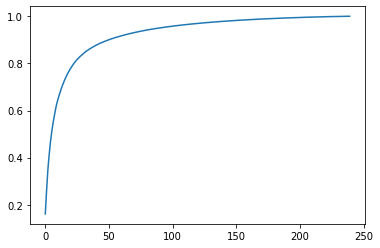

In [ ]:
plt.plot(np.cumsum(model_5.explained_variance_ratio_))

In [ ]:
#on regarde à partir de quelle composante on atteint 99% de la variance
np.argmax(np.cumsum(model_5.explained_variance_ratio_) > 0.99 )

177

In [ ]:
reduce_model_5 = PCA(n_components=177)
reduced_fic_5 = reduce_model_5.fit_transform(normalized_fic5)

In [ ]:
reduced_fic_5.shape

(2000, 177)

In [ ]:
kmeans_5 = KMeans(n_clusters=10, random_state=0).fit(reduced_fic_5)
kmeans_5.predict(reduced_fic_5)

array([8, 8, 8, ..., 9, 9, 9], dtype=int32)

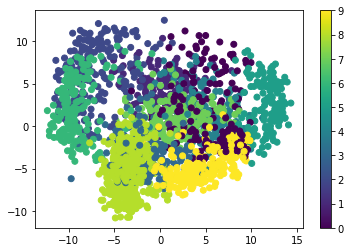

In [ ]:
plt.scatter(reduced_fic_5[:,0],reduced_fic_5[:,1],c=kmeans_5.predict(reduced_fic_5))
plt.colorbar()
#On affiche nos centroides en rouge
#plt.scatter(kmeans_5.cluster_centers_[:,0],kmeans_5.cluster_centers_[:,1],c='r')

#Fichier 6

In [ ]:
fic6 = pd.read_fwf('/content/drive/MyDrive/ANS/Projet_ACP/mfeat/mfeat-zer',header=None)
fic6.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,0.011033,0.831466,15.351804,75.806559,171.554214,490.156556,206.416027,0.122135,2.601646,11.472709,...,1.713529,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208457
1,0.038271,1.166746,10.526913,42.369276,85.187116,420.360566,253.569574,0.033657,0.390566,11.700830,...,2.590208,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567
2,0.042698,1.225007,8.273804,31.744786,54.448177,404.103204,389.980746,0.041733,0.937399,11.629045,...,1.476285,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691
3,0.032418,1.638247,19.205283,51.196682,57.181760,429.052011,256.174645,0.073624,1.973268,13.057108,...,1.349613,14.179518,30.564085,7.097728,173.840759,441.350376,3.706023,13.432311,51.739930,574.887814
4,0.015866,0.611561,8.627839,37.325052,48.509025,459.909634,238.572767,0.046477,1.117292,10.012169,...,0.667971,8.705403,30.242473,9.015714,167.021185,332.479997,1.806273,23.689300,50.407770,492.227513


In [ ]:
fic6.shape

(2000, 47)

In [ ]:
#rename colunm name
liste = [ "zer"+str(i) for i in range(fic6.shape[1])]
rename_colunms(fic6,liste)
fic6.head()

,zer0,zer1,zer2,zer3,zer4,zer5,zer6,zer7,zer8,zer9,...,zer37,zer38,zer39,zer40,zer41,zer42,zer43,zer44,zer45,zer46
0,0.011033,0.831466,15.351804,75.806559,171.554214,490.156556,206.416027,0.122135,2.601646,11.472709,...,1.713529,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208457
1,0.038271,1.166746,10.526913,42.369276,85.187116,420.360566,253.569574,0.033657,0.390566,11.700830,...,2.590208,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567
2,0.042698,1.225007,8.273804,31.744786,54.448177,404.103204,389.980746,0.041733,0.937399,11.629045,...,1.476285,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691
3,0.032418,1.638247,19.205283,51.196682,57.181760,429.052011,256.174645,0.073624,1.973268,13.057108,...,1.349613,14.179518,30.564085,7.097728,173.840759,441.350376,3.706023,13.432311,51.739930,574.887814
4,0.015866,0.611561,8.627839,37.325052,48.509025,459.909634,238.572767,0.046477,1.117292,10.012169,...,0.667971,8.705403,30.242473,9.015714,167.021185,332.479997,1.806273,23.689300,50.407770,492.227513


In [ ]:
scaler = StandardScaler()
normalized_fic6 = scaler.fit_transform(fic6)
normalized_fic6

array([[-1.01482157e+00, -8.04903651e-01, -5.42075781e-01, ...,
        -9.11920558e-01, -6.78676722e-01,  4.26901930e-01],
       [-6.05445275e-01, -5.15614723e-01, -9.53548893e-01, ...,
        -7.02276093e-04, -7.40677925e-01,  1.35145203e-01],
       [-5.38899008e-01, -4.65344635e-01, -1.14569711e+00, ...,
        -6.78448854e-01, -8.98369069e-01,  5.77686439e-01],
       ...,
       [-8.17012169e-01, -8.44797818e-01, -1.01106906e+00, ...,
        -1.60046481e+00, -1.57421989e+00, -1.10378798e+00],
       [-1.02965699e+00, -1.31681918e+00, -1.74167172e+00, ...,
        -6.63876962e-01, -1.20409528e+00,  8.80735035e-01],
       [-7.33652286e-01, -8.52033266e-01, -1.01299140e+00, ...,
         5.75407308e-01, -9.80694704e-01, -1.41894303e+00]])

In [ ]:
model_6 = PCA(n_components=47)
fic6_model = model_6.fit_transform(normalized_fic6)

In [ ]:
#on regarde le % de variance preservé par chaque variable
model_6.explained_variance_ratio_

array([2.42316733e-01, 1.48162490e-01, 9.20181807e-02, 8.10483876e-02,
       5.75426824e-02, 4.58358981e-02, 3.59712281e-02, 3.18318967e-02,
       2.74183663e-02, 2.54089010e-02, 2.37411128e-02, 2.12517928e-02,
       1.94668046e-02, 1.84446183e-02, 1.69438803e-02, 1.41755379e-02,
       1.24603260e-02, 1.19176968e-02, 1.09714918e-02, 9.65719449e-03,
       9.18385029e-03, 7.71410305e-03, 7.30884084e-03, 5.77199459e-03,
       4.77885920e-03, 4.17534639e-03, 3.32415832e-03, 2.02874775e-03,
       1.84778855e-03, 1.51357214e-03, 1.29988112e-03, 1.08880873e-03,
       8.93830409e-04, 7.60116874e-04, 6.13010293e-04, 4.60236793e-04,
       1.91897691e-04, 1.52036629e-04, 9.75065701e-05, 7.42891025e-05,
       6.39534597e-05, 5.18401804e-05, 1.58776706e-05, 2.75397767e-06,
       1.00789490e-06, 3.44273271e-07, 1.28294590e-07])

In [ ]:
#On fait la somme cumule des % et chercher le moment ou elle atteint 95% ou 99%
np.cumsum(model_6.explained_variance_ratio_)

array([0.24231673, 0.39047922, 0.4824974 , 0.56354579, 0.62108847,
       0.66692437, 0.7028956 , 0.7347275 , 0.76214586, 0.78755476,
       0.81129588, 0.83254767, 0.85201447, 0.87045909, 0.88740297,
       0.90157851, 0.91403884, 0.92595653, 0.93692802, 0.94658522,
       0.95576907, 0.96348317, 0.97079201, 0.97656401, 0.98134287,
       0.98551821, 0.98884237, 0.99087112, 0.99271891, 0.99423248,
       0.99553236, 0.99662117, 0.997515  , 0.99827512, 0.99888813,
       0.99934836, 0.99954026, 0.9996923 , 0.99978981, 0.99986409,
       0.99992805, 0.99997989, 0.99999577, 0.99999852, 0.99999953,
       0.99999987, 1.        ])

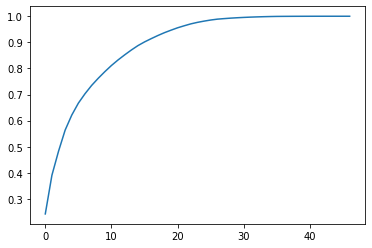

In [ ]:
plt.plot(np.cumsum(model_6.explained_variance_ratio_))

In [ ]:
#on regarde à partir de quelle composante on atteint 99% de la variance
np.argmax(np.cumsum(model_6.explained_variance_ratio_) > 0.99 )

27

In [ ]:
reduce_model_6 = PCA(n_components=27)
reduced_fic_6 = reduce_model_6.fit_transform(normalized_fic6)

In [ ]:
reduced_fic_6.shape

(2000, 27)

In [ ]:
kmeans_6 = KMeans(n_clusters=10, random_state=0).fit(reduced_fic_6)
kmeans_6.predict(reduced_fic_6)

array([9, 9, 9, ..., 3, 1, 3], dtype=int32)

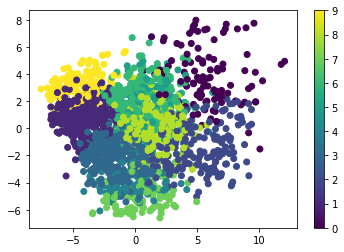

In [ ]:
plt.scatter(reduced_fic_6[:,0],reduced_fic_6[:,1],c=kmeans_6.predict(reduced_fic_6))
plt.colorbar()
#On affiche nos centroides en rouge
#plt.scatter(kmeans_6.cluster_centers_[:,0],kmeans_6.cluster_centers_[:,1],c='r')

#All dataset

In [ ]:
#concatenate  files
df = pd.concat([fic1, fic2, fic3, fic4, fic5, fic6], axis=1)
df.head()

,fac0,fac1,fac2,fac3,fac4,fac5,fac6,fac7,fac8,fac9,...,zer37,zer38,zer39,zer40,zer41,zer42,zer43,zer44,zer45,zer46
0,98,236,531,673,607,647,2,9,3,6,...,1.713529,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208457
1,121,193,607,611,585,665,7,9,2,4,...,2.590208,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567
2,115,141,590,605,557,627,12,6,3,3,...,1.476285,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691
3,90,122,627,692,607,642,0,6,4,5,...,1.349613,14.179518,30.564085,7.097728,173.840759,441.350376,3.706023,13.432311,51.739930,574.887814
4,157,167,681,666,587,666,8,6,1,4,...,0.667971,8.705403,30.242473,9.015714,167.021185,332.479997,1.806273,23.689300,50.407770,492.227513


In [ ]:
df.shape

(2000, 649)

In [ ]:
scaler = StandardScaler()
normalized_df = scaler.fit_transform(df)
normalized_df

array([[-1.90735868e+00, -7.92743252e-01, -8.65037111e-01, ...,
        -9.11920558e-01, -6.78676722e-01,  4.26901930e-01],
       [-1.65531116e+00, -1.18579904e+00, -4.99442765e-01, ...,
        -7.02276093e-04, -7.40677925e-01,  1.35145203e-01],
       [-1.72106269e+00, -1.66112232e+00, -5.81220448e-01, ...,
        -6.78448854e-01, -8.98369069e-01,  5.77686439e-01],
       ...,
       [ 7.11743854e-01, -2.16870817e-01,  6.79117955e-01, ...,
        -1.60046481e+00, -1.57421989e+00, -1.10378798e+00],
       [-2.74529068e-01, -5.64222444e-01,  7.46464282e-01, ...,
        -6.63876962e-01, -1.20409528e+00,  8.80735035e-01],
       [ 9.08998438e-01,  5.14395768e-01,  7.51274734e-01, ...,
         5.75407308e-01, -9.80694704e-01, -1.41894303e+00]])

In [ ]:
model = PCA(n_components=649)
df_model = model.fit_transform(normalized_df)

In [ ]:
#on regarde le % de variance preservé par chaque variable
model.explained_variance_ratio_

array([1.39636592e-01, 9.51133788e-02, 7.65821416e-02, 5.32238253e-02,
       4.66834875e-02, 3.71945829e-02, 3.24691465e-02, 2.61426524e-02,
       2.35405906e-02, 2.19356693e-02, 1.73557434e-02, 1.57415300e-02,
       1.39432498e-02, 1.22112375e-02, 1.19733686e-02, 1.14842705e-02,
       1.00783780e-02, 9.56592047e-03, 8.54122282e-03, 7.65130547e-03,
       7.43775856e-03, 6.82875430e-03, 6.80395658e-03, 6.23547831e-03,
       5.82708781e-03, 5.49792329e-03, 5.35148088e-03, 5.18575181e-03,
       4.98997000e-03, 4.73227372e-03, 4.67590797e-03, 4.53396187e-03,
       4.38856457e-03, 3.99787343e-03, 3.85228036e-03, 3.83886428e-03,
       3.73096634e-03, 3.62305970e-03, 3.51477294e-03, 3.42179186e-03,
       3.34838374e-03, 3.21812405e-03, 3.16911775e-03, 3.08737537e-03,
       3.00750937e-03, 2.90304377e-03, 2.86049587e-03, 2.76115335e-03,
       2.72668182e-03, 2.67087995e-03, 2.64867039e-03, 2.56586942e-03,
       2.52174740e-03, 2.50901907e-03, 2.41492259e-03, 2.39008287e-03,
      

In [ ]:
#On fait la somme cumule des % et chercher le moment ou elle atteint 95% ou 99%
np.cumsum(model.explained_variance_ratio_)

array([0.13963659, 0.23474997, 0.31133211, 0.36455594, 0.41123943,
       0.44843401, 0.48090315, 0.50704581, 0.5305864 , 0.55252207,
       0.56987781, 0.58561934, 0.59956259, 0.61177383, 0.6237472 ,
       0.63523147, 0.64530984, 0.65487577, 0.66341699, 0.67106829,
       0.67850605, 0.68533481, 0.69213876, 0.69837424, 0.70420133,
       0.70969925, 0.71505073, 0.72023649, 0.72522646, 0.72995873,
       0.73463464, 0.7391686 , 0.74355716, 0.74755504, 0.75140732,
       0.75524618, 0.75897715, 0.76260021, 0.76611498, 0.76953677,
       0.77288516, 0.77610328, 0.7792724 , 0.78235977, 0.78536728,
       0.78827033, 0.79113082, 0.79389198, 0.79661866, 0.79928954,
       0.80193821, 0.80450408, 0.80702582, 0.80953484, 0.81194977,
       0.81433985, 0.81669282, 0.81898511, 0.82125395, 0.82344766,
       0.82562954, 0.82774363, 0.82983596, 0.83188866, 0.8338891 ,
       0.8358789 , 0.83782178, 0.83973861, 0.84160232, 0.84345349,
       0.84526922, 0.84703516, 0.84877494, 0.85050008, 0.85220

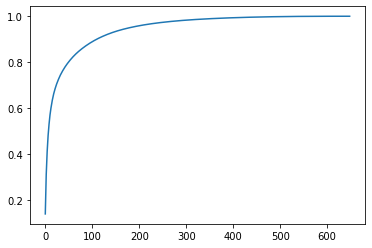

In [ ]:
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [ ]:
#on regarde à partir de quelle composante on atteint 99% de la variance
np.argmax(np.cumsum(model.explained_variance_ratio_) > 0.99 )

358

In [ ]:
reduce_model = PCA(n_components=358)
reduced_df = reduce_model.fit_transform(normalized_df)

In [ ]:
reduced_df.shape

(2000, 358)

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(reduced_df)
kmeans.predict(reduced_df)

array([9, 9, 9, ..., 5, 5, 5], dtype=int32)

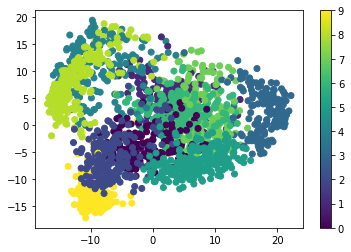

In [ ]:
plt.scatter(reduced_df[:,0],reduced_df[:,1],c=kmeans.predict(reduced_df))
plt.colorbar()
#On affiche nos centroides en rouge
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r')

# *2- Sans sklearn*

#Fichier 1

In [ ]:
fic1.head()

,fac0,fac1,fac2,fac3,fac4,fac5,fac6,fac7,fac8,fac9,...,fac206,fac207,fac208,fac209,fac210,fac211,fac212,fac213,fac214,fac215
0,98,236,531,673,607,647,2,9,3,6,...,474,536,628,632,18,36,8,15,12,13
1,121,193,607,611,585,665,7,9,2,4,...,520,458,570,634,15,32,11,13,15,11
2,115,141,590,605,557,627,12,6,3,3,...,535,498,572,656,20,35,16,14,13,6
3,90,122,627,692,607,642,0,6,4,5,...,576,549,628,621,16,35,7,12,15,9
4,157,167,681,666,587,666,8,6,1,4,...,594,525,568,653,16,35,10,15,13,13


Step 1: Normalisation

In [ ]:
def scale(x):
  return (x-x.mean(0))/x.std(0)

In [ ]:
normalized_fic_1 = scale(fic1)
normalized_fic_1

,fac0,fac1,fac2,fac3,fac4,fac5,fac6,fac7,fac8,fac9,...,fac206,fac207,fac208,fac209,fac210,fac211,fac212,fac213,fac214,fac215
0,-1.906882,-0.792545,-0.864821,-0.472519,-0.683703,-0.409280,-1.537234,-1.274927,-1.390649,-0.747721,...,-1.295928,-0.878797,-0.233531,-0.628922,0.044690,1.805986,-1.633457,1.175291,-0.858480,-0.097581
1,-1.654897,-1.185503,-0.499318,-0.924348,-1.133232,-0.204481,-1.096765,-1.274927,-1.503170,-1.237387,...,-1.030655,-1.530432,-1.258526,-0.605577,-0.528254,1.304880,-1.123639,0.400033,0.652485,-0.528877
2,-1.720632,-1.660707,-0.581075,-0.968074,-1.705360,-0.636835,-0.656297,-1.682990,-1.390649,-1.482221,...,-0.944152,-1.196260,-1.223181,-0.348784,0.426652,1.680709,-0.273942,0.787662,-0.354825,-1.607117
3,-1.994529,-1.834339,-0.403133,-0.334055,-0.683703,-0.466169,-1.713421,-1.682990,-1.278128,-0.992554,...,-0.707713,-0.770191,-0.233531,-0.757318,-0.337273,1.680709,-1.803397,0.012404,0.652485,-0.960173
4,-1.260487,-1.423105,-0.143433,-0.523532,-1.092366,-0.193103,-1.008672,-1.682990,-1.615692,-1.237387,...,-0.603910,-0.970694,-1.293870,-0.383801,-0.337273,1.680709,-1.293579,1.175291,-0.354825,-0.097581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.350023,-0.737714,1.039642,-0.815035,-1.562328,-0.102081,0.488920,-0.186757,-1.728213,-0.502888,...,1.229939,-1.121071,-1.134819,0.830131,-0.528254,0.302668,-1.123639,0.787662,-1.865791,0.980659
1996,0.569140,0.066478,1.001168,-0.181016,-0.642837,0.114096,0.753200,-0.322778,-0.828043,-0.013221,...,1.149203,-0.728419,-0.374910,-0.628922,-1.101197,0.427945,-1.123639,-0.762854,-0.858480,0.765011
1997,0.711566,-0.216817,0.678948,-0.100853,-1.214964,-0.261369,0.224639,-0.594821,-0.603001,0.231612,...,0.820494,-0.519562,-0.905079,-0.056973,0.044690,0.678498,-0.783760,1.175291,1.659796,1.627603
1998,-0.274460,-0.564081,0.746278,-0.764022,-1.541895,-0.773367,0.400826,-0.458799,-1.503170,-1.237387,...,0.808961,-1.196260,-1.505938,0.234837,-0.337273,0.553221,-0.783760,0.400033,0.652485,0.333715


Step 2 : Calcule de la matrice de covariance

In [ ]:
cov_fic_1= np.cov(normalized_fic_1,rowvar=False)
cov_fic_1

array([[ 1.00000000e+00,  5.03564309e-01,  4.46389702e-02, ...,
        -8.90844978e-02, -1.99978993e-01,  1.03425679e-01],
       [ 5.03564309e-01,  1.00000000e+00,  1.47404514e-01, ...,
        -3.76067528e-01, -3.02331264e-01,  6.52162118e-02],
       [ 4.46389702e-02,  1.47404514e-01,  1.00000000e+00, ...,
        -8.08809133e-02, -6.90924457e-02,  4.51795694e-04],
       ...,
       [-8.90844978e-02, -3.76067528e-01, -8.08809133e-02, ...,
         1.00000000e+00,  1.34199592e-01,  2.84336166e-02],
       [-1.99978993e-01, -3.02331264e-01, -6.90924457e-02, ...,
         1.34199592e-01,  1.00000000e+00, -8.14223842e-02],
       [ 1.03425679e-01,  6.52162118e-02,  4.51795694e-04, ...,
         2.84336166e-02, -8.14223842e-02,  1.00000000e+00]])

Step 3 : Valeurs propres et vecteurs propres

In [ ]:
eigen_values,eigen_vectors=np.linalg.eig(cov_fic_1)
eigen_values

array([ 4.35220959e+01,  2.85707050e+01,  2.21570102e+01,  1.50796733e+01,
        1.21287289e+01,  9.82592433e+00,  7.69444423e+00,  6.71993572e+00,
        5.54739201e+00,  5.07479146e+00,  4.14576476e+00,  3.66488612e+00,
        3.28757219e+00,  2.81967219e+00,  2.58599137e+00,  2.44390102e+00,
        2.30723940e+00,  1.93344351e+00,  1.86423078e+00,  1.57352072e+00,
        1.54491945e+00,  1.48441550e+00,  1.33529931e+00,  1.23747743e+00,
        1.20597242e+00,  1.07324370e+00,  1.00802219e+00,  9.24648798e-01,
        8.90815264e-01,  8.43260998e-01,  8.35837703e-01,  8.09223389e-01,
        7.84938965e-01,  7.57240363e-01,  7.28660297e-01,  7.00857890e-01,
        6.58104124e-01,  6.38366116e-01,  5.53415221e-01,  5.19197060e-01,
        5.13485318e-01,  4.99343007e-01,  4.60948189e-01,  4.27407774e-01,
        4.12658255e-01,  3.96375693e-01,  3.84845718e-01,  3.75565317e-01,
        3.60434969e-01,  3.50283863e-01,  3.48937972e-01,  3.25107634e-01,
        3.10395565e-01,  

In [ ]:
eigen_vectors

array([[-0.03195672,  0.09486972, -0.03845156, ..., -0.01687598,
        -0.01049461, -0.00985718],
       [-0.07749905,  0.12888386, -0.06662581, ...,  0.03608825,
         0.02909189, -0.05880063],
       [-0.00693287,  0.03441585, -0.04910955, ..., -0.00240299,
        -0.00317509, -0.0033675 ],
       ...,
       [ 0.01981426, -0.06629287,  0.04410737, ...,  0.00034634,
         0.00375716, -0.01572797],
       [ 0.04558988, -0.0504812 , -0.01361504, ..., -0.00171226,
         0.00745927,  0.00056865],
       [-0.07825344, -0.03166415,  0.03564225, ..., -0.00559189,
        -0.00036162,  0.02624126]])

In [ ]:
print(eigen_values.shape)
print(eigen_vectors.shape)


(216,)
(216, 216)


Step 4 : Trie des valeurs propres

In [ ]:
sort_list=np.argsort(eigen_values)[::-1]
sort_list

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        79,  78,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       105, 104, 106, 107, 108, 109, 110, 111, 112, 115, 114, 113, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 141,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 152, 154, 155,
       156, 157, 168, 158, 159, 169, 170, 171, 173, 174, 175, 176, 177,
       191, 178, 205, 193, 206, 192, 209, 208, 207, 186, 210, 18

Step 5 : selection des k vecteurs propres

On peut calculer le pourcentage d'information que contient chaque valeur propre

In [ ]:
pourcentage_information =  (eigen_values/ eigen_values.sum() ) *100
pourcentage_information

array([ 2.01491185e+01,  1.32271782e+01,  1.02578751e+01,  6.98133024e+00,
        5.61515227e+00,  4.54903904e+00,  3.56224270e+00,  3.11108135e+00,
        2.56823704e+00,  2.34944049e+00,  1.91933554e+00,  1.69670654e+00,
        1.52202416e+00,  1.30540379e+00,  1.19721823e+00,  1.13143566e+00,
        1.06816639e+00,  8.95112737e-01,  8.63069807e-01,  7.28481816e-01,
        7.15240485e-01,  6.87229400e-01,  6.18194125e-01,  5.72906219e-01,
        5.58320566e-01,  4.96872085e-01,  4.66676938e-01,  4.28078147e-01,
        4.12414474e-01,  3.90398610e-01,  3.86961900e-01,  3.74640458e-01,
        3.63397669e-01,  3.50574242e-01,  3.37342730e-01,  3.24471245e-01,
        3.04677835e-01,  2.95539868e-01,  2.56210751e-01,  2.40369009e-01,
        2.37724684e-01,  2.31177318e-01,  2.13401940e-01,  1.97873969e-01,
        1.91045488e-01,  1.83507265e-01,  1.78169314e-01,  1.73872832e-01,
        1.66868041e-01,  1.62168455e-01,  1.61545358e-01,  1.50512794e-01,
        1.43701651e-01,  

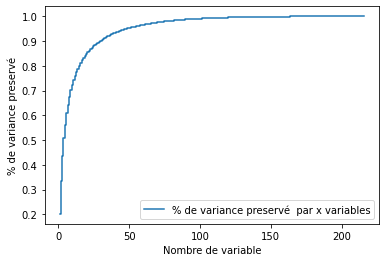

In [ ]:
total = sum(eigen_values)
#% de variance preservé par chaque variable
var_exp = [(i / total) for i in sorted(eigen_values,reverse = True)]
#% de variance preservé  par x variables
cum_var_exp = np.cumsum(var_exp)
#plt.bar(range(1,217),var_exp,alpha=0.5,align='center',label='% de variance preservé par chaque variable')
plt.step(range(1,217),cum_var_exp,where='mid',label='% de variance preservé  par x variables')
plt.xlabel('Nombre de variable')
plt.ylabel('% de variance preservé')
plt.legend(loc='best')
plt.show() 

Nous allons créer une fonction choix nombre de variable qui prend en parametre de pourcentage de variance que l'on veut conserver et nous retourne le nombre de variable que l'on doit choisir

In [ ]:
def choix_nombre_variable(p):
  #% de variance preservé par chaque variable
  var_exp = [(i / total) for i in sorted(eigen_values,reverse = True)]
  #% de variance preservé  par x variables
  cum_var_exp = np.cumsum(var_exp)
  return np.argmax(cum_var_exp > p ) 


In [ ]:
choix_nombre_variable(0.99)

98

In [ ]:
eigen_vectors =eigen_vectors[:,sort_list[:98]]
eigen_vectors

array([[-0.03195672,  0.09486972, -0.03845156, ..., -0.07930335,
         0.07814289,  0.04179301],
       [-0.07749905,  0.12888386, -0.06662581, ...,  0.0918775 ,
        -0.00716647, -0.01741537],
       [-0.00693287,  0.03441585, -0.04910955, ..., -0.11051588,
         0.11330212,  0.07623126],
       ...,
       [ 0.01981426, -0.06629287,  0.04410737, ..., -0.06079733,
        -0.05776592,  0.00724892],
       [ 0.04558988, -0.0504812 , -0.01361504, ..., -0.06481559,
         0.07502684,  0.00738215],
       [-0.07825344, -0.03166415,  0.03564225, ..., -0.01566091,
        -0.01922163,  0.11196483]])

In [ ]:
z = normalized_fic_1@ eigen_vectors
z

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,5.186536,-8.382596,4.832743,-2.799214,-2.805169,-2.288734,1.662634,-0.118457,-1.096591,2.066831,...,-0.351792,-0.062490,-0.072749,0.261082,0.111463,0.002755,0.281323,-0.180912,0.052546,-0.155399
1,3.615773,-8.702090,2.851760,-2.702084,-3.017970,-3.571832,-0.640645,-0.618792,-0.371899,1.595599,...,-0.156073,0.104150,-0.208763,-0.238141,-0.230514,0.278568,0.034483,0.031826,-0.078834,0.186434
2,6.184979,-8.748326,1.787839,-1.040426,-2.675661,-2.543616,0.696938,-2.923063,-1.945711,0.672495,...,-0.192347,-0.088469,0.233170,0.437740,-0.453386,0.706092,0.114858,-0.115213,-0.008660,0.062758
3,4.616285,-8.133907,3.313236,-1.405622,-3.268122,-1.675422,0.247583,-2.788094,-0.485869,0.650764,...,0.289848,-0.026750,-0.140332,0.317947,-0.030762,0.253266,0.275339,0.168971,0.199632,-0.162727
4,5.320648,-7.101168,3.703536,-1.931870,-1.897432,-4.216388,-1.974475,-0.686940,-2.612027,2.340589,...,0.194364,-0.045133,0.013165,-0.060573,-0.145823,-0.015033,0.055295,-0.311618,0.031228,0.054888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-4.565725,-6.215404,-5.726729,2.211718,3.676304,-1.278701,-0.667123,0.555200,-4.092199,-2.600299,...,0.184113,0.136089,-0.129006,0.237828,-0.016972,0.020176,0.353343,0.146329,0.132718,-0.086688
1996,-8.924901,-4.466007,-1.015330,1.291756,1.976129,-0.970153,-0.488940,-3.229834,-1.989706,0.704430,...,-0.361705,0.303701,0.605943,0.285222,-0.063079,-0.159949,-0.139808,-0.308549,0.156901,-0.268980
1997,-4.010684,-5.474193,-4.498578,5.509913,0.881874,-1.824881,-3.530985,3.721834,-0.781526,-1.308728,...,0.186955,0.007533,0.194688,-0.052759,-0.203727,-0.129724,0.049979,-0.350840,-0.040765,-0.066137
1998,-2.590588,-7.619770,-6.763002,2.338453,0.171720,0.129913,-0.775329,0.997155,-0.990779,-1.341245,...,-0.494714,0.210571,0.237404,0.089746,-0.135750,0.545425,0.021643,0.042369,0.081922,0.094791


In [ ]:
z.shape

(2000, 98)

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(z)
kmeans.predict(z)

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

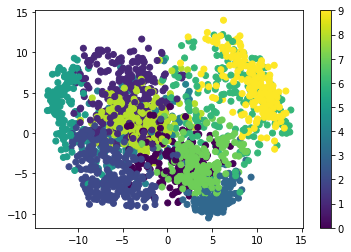

In [ ]:
plt.scatter(z.iloc[:,0],z.iloc[:,1],c=kmeans.predict(z))
plt.colorbar()